In [17]:
import torch

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import sklearn.metrics as measure
import numpy as np


TRAIN_DATA_PATH_1 = "../../data/embeddings/wav2vec/pretrained_out/audio_trn_0-150_embeddings.pt"
TRAIN_DATA_PATH_2 = "../../data/embeddings/wav2vec/pretrained_out/audio_trn_150-300_embeddings.pt"
TRAIN_DATA_PATH_3 = "../../data/embeddings/wav2vec/pretrained_out/audio_trn_300-440_embeddings.pt"
VAL_DATA_PATH = "../../data/embeddings/wav2vec/pretrained_out/audio_val_0-108_embeddings.pt"

In [18]:
# Import embeddings and prepare x_trn, x_val, y_trn, y_val.
data_train_1 = torch.load(TRAIN_DATA_PATH_1)
data_train_2 = torch.load(TRAIN_DATA_PATH_2)
data_train_3 = torch.load(TRAIN_DATA_PATH_3)
data_val = torch.load(VAL_DATA_PATH)


In [19]:
classifiers = {

    "Neural Net": MLPClassifier(activation='relu', alpha=0.005, learning_rate='constant', hidden_layer_sizes = (128, 64, 32), solver = 'adam', random_state=10),
    
}


In [20]:
def classify(x_trn, y_trn, x_val, y_val, name, clf):
    clf = make_pipeline(StandardScaler(), clf)
    clf.fit(x_trn, y_trn)
    pred_val = clf.predict(x_val)
    accuracy = measure.accuracy_score(y_val, pred_val)
    print(f"{name}: {accuracy:.3f}")

    disp = measure.ConfusionMatrixDisplay.from_predictions(
            y_val,
            pred_val,
            display_labels=["Dance (0.18)", "Couple Romance (0.32)",
                            "Heartbreak Romance (0.27)", "Memes (0.09)",
                            "Pranks (0.14)"],
            normalize="true",
            xticks_rotation=45
            )

    plt.show()


In [21]:
x_trn_1, y_trn_1 = data_train_1["embeddings"].detach().numpy(), data_train_1["y"]
x_trn_2, y_trn_2 = data_train_2["embeddings"].detach().numpy(), data_train_2["y"]
x_trn_3, y_trn_3 = data_train_3["embeddings"].detach().numpy(), data_train_3["y"]

x_val, y_val = data_val["embeddings"].detach().numpy(), data_val["y"]

In [22]:
x_trn = np.vstack((x_trn_1, x_trn_2, x_trn_3))
y_trn = np.hstack((y_trn_1, y_trn_2, y_trn_3))

In [13]:
ss = StandardScaler()
x_trn_norm = ss.fit_transform(x_trn)
x_val_norm = ss.transform(x_val)

Neural Net: 0.454


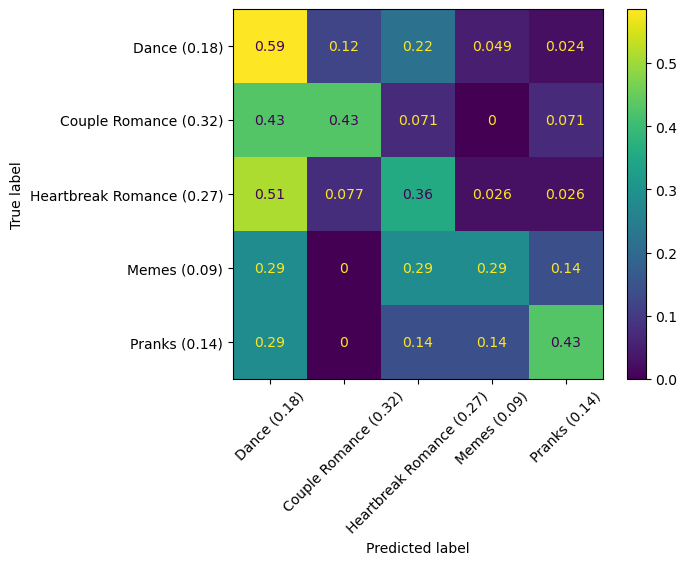

In [26]:
#Best Checkpoint results 
for name, clf in classifiers.items():
    classify(x_trn, y_trn, x_val, y_val, name, clf)